In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd
# Download data
nifty = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
nifty.head()

/tmp/ipython-input-1064000012.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [3]:
nifty.to_csv("nifty50_data.csv")

In [4]:
import yfinance as yf
import pandas as pd
# Download NIFTY 50 data
df = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
df.head()

/tmp/ipython-input-3889802940.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("^NSEI", start="2010-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0
2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0
2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0
2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0
2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0


In [5]:
df = df.reset_index()   # Make Date a column
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Date, )         3680 non-null   datetime64[ns]
 1   (Close, ^NSEI)   3680 non-null   float64       
 2   (High, ^NSEI)    3680 non-null   float64       
 3   (Low, ^NSEI)     3680 non-null   float64       
 4   (Open, ^NSEI)    3680 non-null   float64       
 5   (Volume, ^NSEI)  3680 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 172.6 KB


In [6]:
df['Daily Return'] = df['Close'].pct_change()
df.head()

Price,Date,Close,High,Low,Open,Volume,Daily Return
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,
0,2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0,NaN
1,2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0,0.008734
2,2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0,0.000739
3,2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0,-0.003540
4,2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0,-0.003487


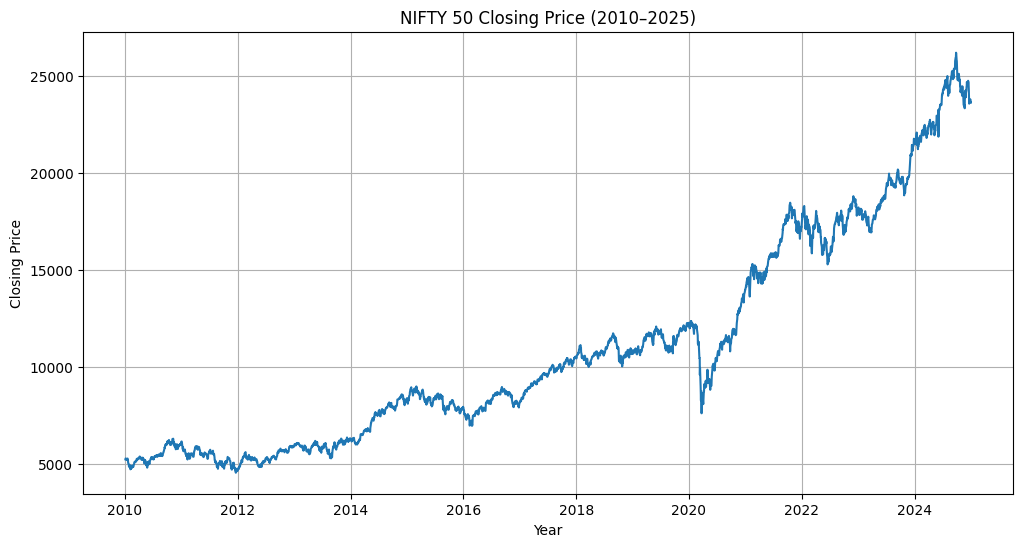

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'])
plt.title("NIFTY 50 Closing Price (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

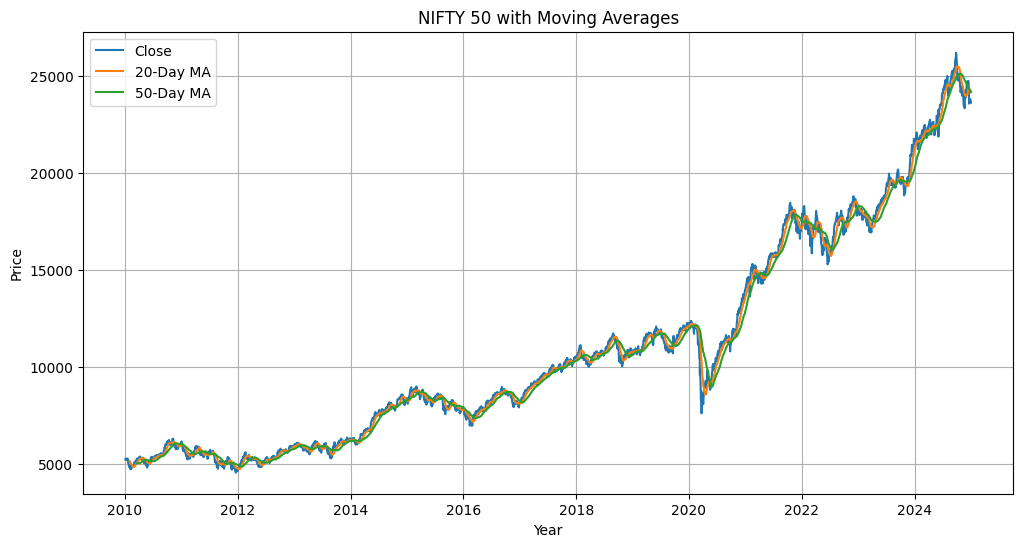

In [8]:
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA20'], label='20-Day MA')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.title("NIFTY 50 with Moving Averages")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

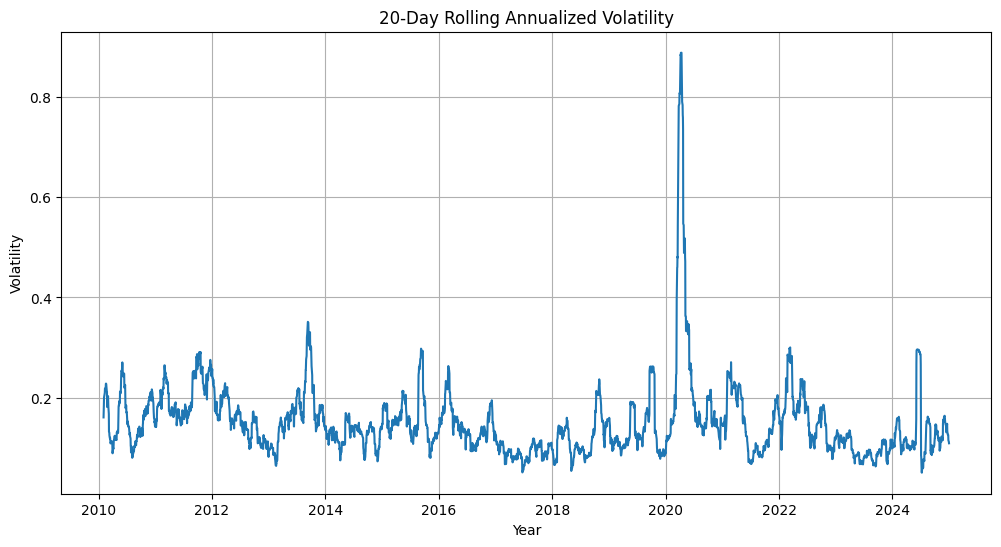

In [9]:
# Rolling Volatility (20-day)
df['Volatility'] = df['Daily Return'].rolling(window=20).std() * (252 ** 0.5)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volatility'])
plt.title("20-Day Rolling Annualized Volatility")
plt.xlabel("Year")
plt.ylabel("Volatility")
plt.grid(True)
plt.show()

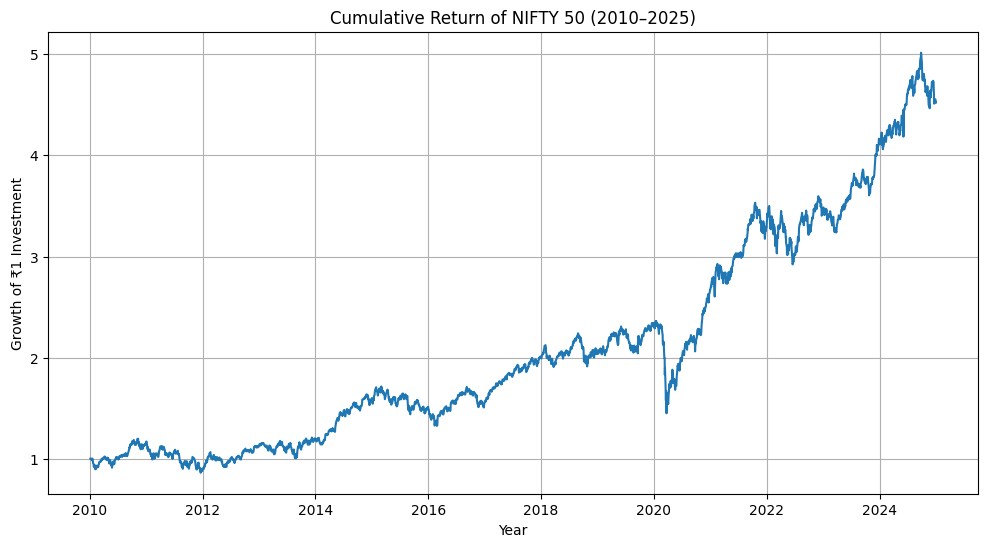

In [10]:
# Cumulative Returns
df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Cumulative Return'])
plt.title("Cumulative Return of NIFTY 50 (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Growth of ₹1 Investment")
plt.grid(True)
plt.show()

Maximum Drawdown: -0.38439852452742107


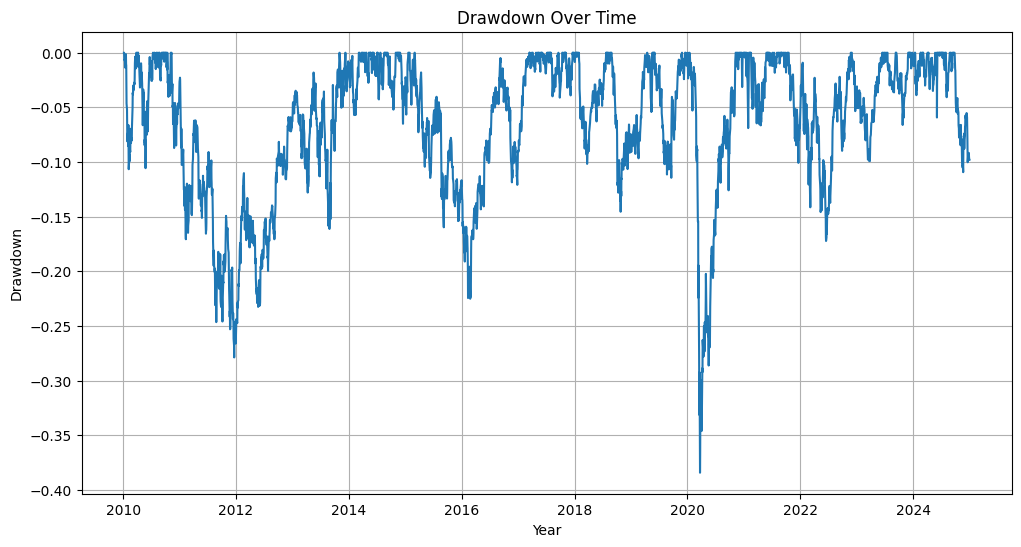

In [11]:
# Rolling maximum
df['Rolling Max'] = df['Cumulative Return'].cummax()
# Drawdown
df['Drawdown'] = df['Cumulative Return'] / df['Rolling Max'] - 1
# Maximum Drawdown
max_drawdown = df['Drawdown'].min()
print("Maximum Drawdown:", max_drawdown)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Drawdown'])
plt.title("Drawdown Over Time")
plt.xlabel("Year")
plt.ylabel("Drawdown")
plt.grid(True)
plt.show()

In [12]:
# Annualized Return
annual_return = df['Daily Return'].mean() * 252
# Annualized Volatility
annual_volatility = df['Daily Return'].std() * (252 ** 0.5)
# Sharpe Ratio (Assuming risk-free rate = 0)
sharpe_ratio = annual_return / annual_volatility
print("Annual Return:", annual_return)
print("Annual Volatility:", annual_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Annual Return: 0.11747844679781388
Annual Volatility: 0.1677572455407269
Sharpe Ratio: 0.7002883626227239


In [13]:
print("----- PERFORMANCE SUMMARY -----")
print(f"Annualized Return: {annual_return:.2%}")
print(f"Annualized Volatility: {annual_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")

----- PERFORMANCE SUMMARY -----
Annualized Return: 11.75%
Annualized Volatility: 16.78%
Sharpe Ratio: 0.70
Maximum Drawdown: -38.44%


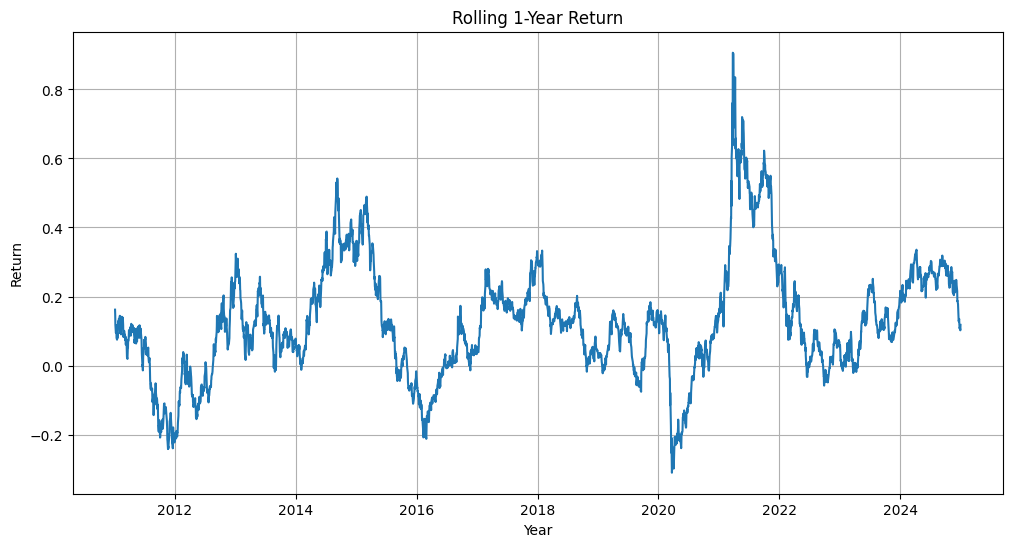

In [14]:
df['1Y Return'] = df['Close'].pct_change(252)
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['1Y Return'])
plt.title("Rolling 1-Year Return")
plt.xlabel("Year")
plt.ylabel("Return")
plt.grid(True)
plt.show()

In [15]:
summary = pd.DataFrame({
    "Metric": ["Annual Return", "Annual Volatility", "Sharpe Ratio", "Max Drawdown"],
    "Value": [annual_return, annual_volatility, sharpe_ratio, max_drawdown]
})
summary

,Metric,Value
0,Annual Return,0.117478
1,Annual Volatility,0.167757
2,Sharpe Ratio,0.700288
3,Max Drawdown,-0.384399


## Key Insights

• The index generated an annualized return of X% over the period.
• Risk-adjusted performance (Sharpe Ratio) indicates ...
• Maximum drawdown highlights vulnerability during crisis periods.
• Rolling volatility spikes align with macroeconomic stress events.


In [16]:
df.to_csv("nifty_processed.csv", index=False)

In [17]:
import sqlite3
# Create database
conn = sqlite3.connect("nifty.db")

# Flatten column names before saving to SQL
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# Load dataframe into SQL table
df.to_sql("nifty_data", conn, if_exists="replace", index=False)
print("Data loaded into SQL database successfully.")

Data loaded into SQL database successfully.


In [22]:
query = "PRAGMA table_info(nifty_data);"
pd.read_sql(query, conn)

,cid,name,type,notnull,dflt_value,pk
0,0,"('Date', '')",TIMESTAMP,0,None,0
1,1,"('Close', '^NSEI')",REAL,0,None,0
2,2,"('High', '^NSEI')",REAL,0,None,0
3,3,"('Low', '^NSEI')",REAL,0,None,0
4,4,"('Open', '^NSEI')",REAL,0,None,0
5,5,"('Volume', '^NSEI')",INTEGER,0,None,0
6,6,"('Daily Return', '')",REAL,0,None,0
7,7,"('MA20', '')",REAL,0,None,0
8,8,"('MA50', '')",REAL,0,None,0
9,9,"('Volatility', '')",REAL,0,None,0


In [23]:
# Flatten multi-level columns
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
# Remove spaces in column names (SQL-friendly)
df.columns = df.columns.str.replace(" ", "_")
df.head()

,Date,Close,High,Low,Open,Volume,Daily_Return,MA20,MA50,Volatility,Cumulative_Return,Rolling_Max,Drawdown,1Y_Return
0,2010-01-04,5232.200195,5238.450195,5167.100098,5200.899902,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-05,5277.899902,5288.350098,5242.399902,5277.149902,0,0.008734,NaN,NaN,NaN,1.008734,1.008734,0.000000,NaN
2,2010-01-06,5281.799805,5310.850098,5260.049805,5278.149902,0,0.000739,NaN,NaN,NaN,1.009480,1.009480,0.000000,NaN
3,2010-01-07,5263.100098,5302.549805,5244.750000,5281.799805,0,-0.003540,NaN,NaN,NaN,1.005906,1.009480,-0.003540,NaN
4,2010-01-08,5244.750000,5276.750000,5234.700195,5264.250000,0,-0.003487,NaN,NaN,NaN,1.002399,1.009480,-0.007015,NaN


In [24]:
# Reload into SQL
df.to_sql("nifty_data", conn, if_exists="replace", index=False)
print("Clean table loaded successfully.")

Clean table loaded successfully.


In [25]:
query = """
SELECT Date, Daily_Return
FROM nifty_data
ORDER BY ABS(Daily_Return) DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Date,Daily_Return
0,2020-03-23 00:00:00,-0.129805
1,2020-04-07 00:00:00,0.087632
2,2020-03-12 00:00:00,-0.083019
3,2020-03-16 00:00:00,-0.076121
4,2020-03-25 00:00:00,0.066247


In [26]:
query = """
SELECT
    Date,
    Daily_Return,
    AVG(Daily_Return) OVER (
        ORDER BY Date
        ROWS BETWEEN 29 PRECEDING AND CURRENT ROW
    ) AS Rolling_30D_Avg_Return
FROM nifty_data
LIMIT 100;
"""
pd.read_sql(query, conn)

,Date,Daily_Return,Rolling_30D_Avg_Return
0,2010-01-04 00:00:00,NaN,NaN
1,2010-01-05 00:00:00,0.008734,0.008734
2,2010-01-06 00:00:00,0.000739,0.004737
3,2010-01-07 00:00:00,-0.003540,0.001978
4,2010-01-08 00:00:00,-0.003487,0.000612
...,...,...,...
95,2010-05-25 00:00:00,-0.027751,-0.003427
96,2010-05-26 00:00:00,0.023020,-0.002555
97,2010-05-27 00:00:00,0.017428,-0.001665
98,2010-05-28 00:00:00,0.012682,-0.001173
